## Домашнее задание:

1. Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либонейронной сети, работающей airline-passengers (она прилагается вместе с датасетом куроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ.


2. Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения.

In [38]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

In [39]:
tf.test.is_built_with_cuda()

True

In [40]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### IMDB reviews (keras)

In [41]:
max_features = 20000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 64 # увеличьте значение для ускорения обучения
epochs = 2

In [42]:
print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Загрузка данных...


In [43]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [44]:
decoded_sequence

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit the

In [45]:
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

25000 тренировочные последовательности
25000 тестовые последовательности


In [46]:
len(x_train[0])

218

In [47]:
len(x_train[11])

99

In [48]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [49]:
max_features

20000

In [51]:
layer = Embedding(max_features, 128)

In [52]:
layer(x_train[0]).shape

TensorShape([80, 128])

In [53]:
layer(x_train[11]).shape

TensorShape([80, 128])

In [54]:
print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Построение модели...


In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,708,225
Trainable params: 2,708,225
Non-trainable params: 0
_________________________________________________________________


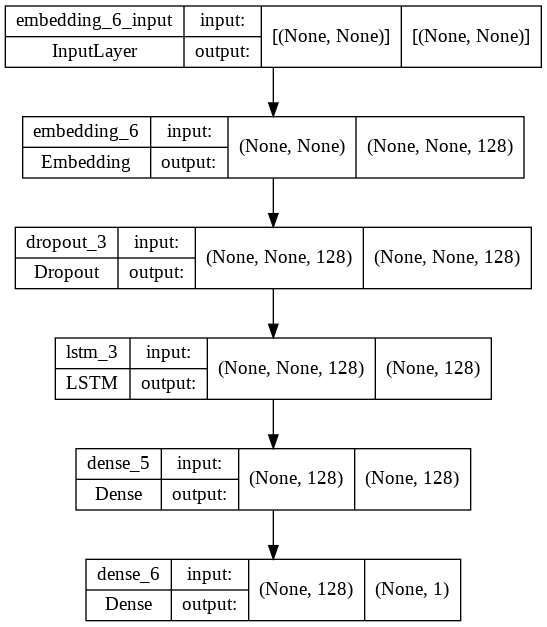

In [56]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [57]:
opt = keras.optimizers.RMSprop(learning_rate=0.005, decay=2e-4)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [58]:
print('Процесс обучения...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs, 
              validation_data=(x_test, y_test))

Процесс обучения...
Epoch 1/2
391/391 [==============================] - 136s 341ms/step - loss: 0.5572 - accuracy: 0.7055 - val_loss: 0.3835 - val_accuracy: 0.8359
Epoch 2/2
391/391 [==============================] - 132s 338ms/step - loss: 0.3189 - accuracy: 0.8655 - val_loss: 0.3410 - val_accuracy: 0.8587


In [59]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

391/391 [==============================] - 9s 22ms/step - loss: 0.3410 - accuracy: 0.8587


In [60]:
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)

Результат при тестировании: 0.3409850001335144
Тестовая точность: 0.858680009841919


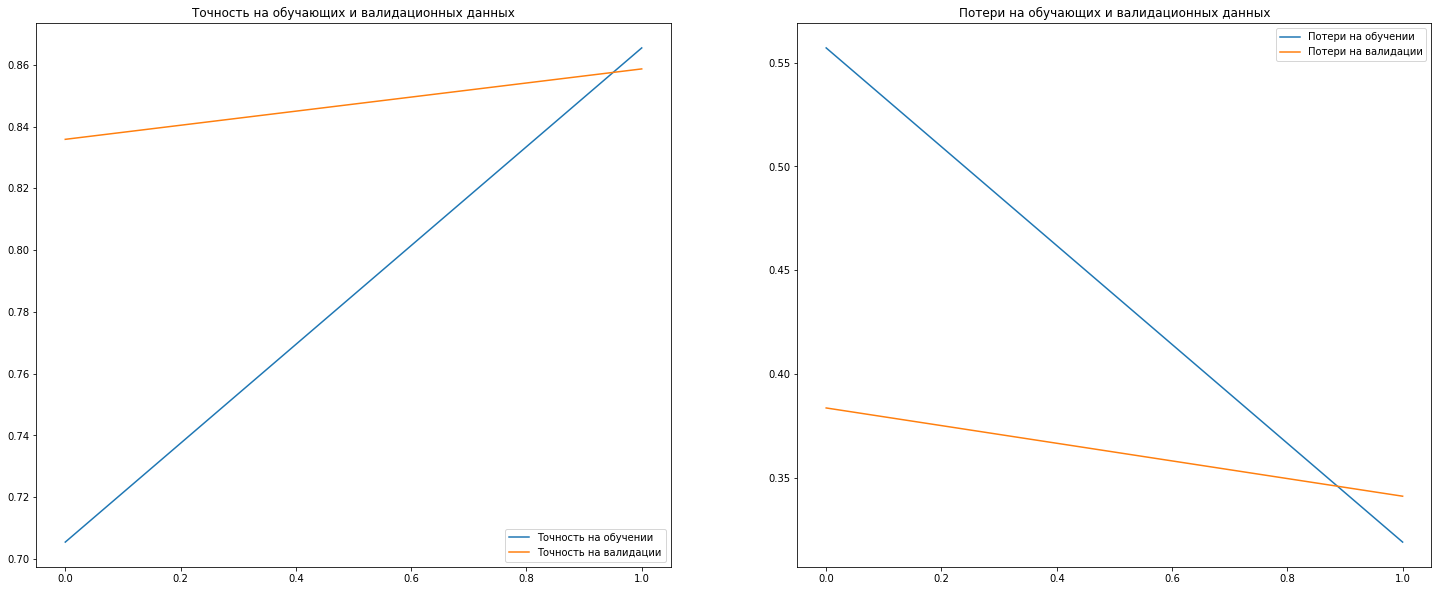

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

### Генерация текста на основе книжки «Алиса в стране чудес»

In [63]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Sequential

In [64]:
!wget 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1U9wqadeR4HeYEyg2JlpPQonoQrdQYALJ' -O alice_in_wonderland.zip

--2022-07-18 11:27:08--  https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1U9wqadeR4HeYEyg2JlpPQonoQrdQYALJ
Resolving drive.google.com (drive.google.com)... 172.253.62.101, 172.253.62.139, 172.253.62.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/abajt3np0cng4ansb3tt2m4j0t6guirn/1658143575000/06840004559052771215/*/1U9wqadeR4HeYEyg2JlpPQonoQrdQYALJ?e=download&uuid=2a02a78f-64b0-4897-8c05-31b6630d2cd3 [following]
--2022-07-18 11:27:09--  https://doc-0s-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/abajt3np0cng4ansb3tt2m4j0t6guirn/1658143575000/06840004559052771215/*/1U9wqadeR4HeYEyg2JlpPQonoQrdQYALJ?e=download&uuid=2a02a78f-64b0-4897-8c05-31b6630d2cd3
Resolving doc-0s-18-docs.googleusercontent.com (doc-0s-18-docs.googleusercontent.com)... 

In [65]:
!unzip alice_in_wonderland.zip

Archive:  alice_in_wonderland.zip
  inflating: alice_in_wonderland.txt  


In [66]:
# построчное чтение из примера с текстом 
with open("alice_in_wonderland.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set(text)
nb_chars = len(chars)

In [67]:
len(chars)

55

In [68]:
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

In [82]:
# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])

In [83]:
len(input_chars)

158773

In [84]:
input_chars[0], label_chars[0]

('project gu', 't')

In [85]:
input_chars[1], label_chars[1]

('roject gut', 'e')

In [86]:
# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [88]:
X.shape

(158773, 10, 55)

In [89]:
# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 256, 256
NUM_ITERATIONS = 30 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 5
NUM_PREDS_PER_EPOCH = 100

In [90]:
model = Sequential()
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

In [91]:
# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred

Итерация #: 0
Epoch 1/5
621/621 [==============================] - 5s 6ms/step - loss: 2.4749
Epoch 2/5
621/621 [==============================] - 3s 6ms/step - loss: 2.0376
Epoch 3/5
621/621 [==============================] - 4s 6ms/step - loss: 1.8344
Epoch 4/5
621/621 [==============================] - 4s 6ms/step - loss: 1.6924
Epoch 5/5
621/621 [==============================] - 4s 6ms/step - loss: 1.5817
Генерация из посева: d not come
d not come the sear the caterpillar what she said the caterpillar what she said the caterpillar what she said ==================================================
Итерация #: 1
Epoch 1/5
621/621 [==============================] - 4s 6ms/step - loss: 1.4928
Epoch 2/5
621/621 [==============================] - 4s 6ms/step - loss: 1.4174
Epoch 3/5
621/621 [==============================] - 4s 6ms/step - loss: 1.3524
Epoch 4/5
621/621 [==============================] - 4s 6ms/step - loss: 1.2950
Epoch 5/5
621/621 [==============================] - 4s 6ms

In [78]:
y.shape

(158753, 55)

Вывод:

1. Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либонейронной сети, работающей airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ.

Анализ:
- Удалось добиться незначительного улучшения точности модели;
- Прослеживается быстрое переобучение модели;
- Наиболее стабильный результат достигается при помощи оптимизатора RMSprop с плавным уменьшением learning_rate;
- Изменение других параметров не способствуют повышению точности.

2. Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения.

Оптимальные параметры (в виду того, что loss перестает умешьшаться):
- SEQLEN = 10;
- batch_size = 258;
- num_iterations = 30;
- num_epoch_per_iteration = 5.

Пример генерации:

Генерация из посева: certain!

certain! i did the conversations in locations where we have not met the solicitation requirements of paragraph

Перевод: определенный! я вел разговоры в местах, где мы не выполнили требования параграфа